In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
X_bp = pd.read_excel('X_bp.xlsx')
X_bp.shape

(1023, 11)

In [4]:
X_bp

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

In [5]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [4]:
X_nup = pd.read_excel('X_nup.xlsx')
X_nup.shape

(1040, 4)

In [7]:
X_nup

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0              0                   0     4.000000          57.000000
1              1                   0     4.000000          60.000000
2              2                   0     4.000000          70.000000
3              3                   0     5.000000          47.000000
4              4                   0     5.000000          57.000000
...          ...                 ...          ...                ...
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

[1040 rows x 4 columns]

In [8]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [5]:
df = pd.concat([X_bp, X_nup], axis=1, join='inner')

In [10]:
df.columns

Index(['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Unnamed: 0', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [7]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [14]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [15]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [16]:
print(f'Колличество дубликатов: {df.duplicated().sum()}')

Колличество дубликатов: 0


In [17]:
df.describe().T.round(3)

count      mean      std       min  \
Соотношение матрица-наполнитель       1023.0     2.930    0.913     0.389   
Плотность, кг/м3                      1023.0  1975.735   73.729  1731.765   
модуль упругости, ГПа                 1023.0   739.923  330.232     2.437   
Количество отвердителя, м.%           1023.0   110.571   28.296    17.740   
Содержание эпоксидных групп,%_2       1023.0    22.244    2.406    14.255   
Температура вспышки, С_2              1023.0   285.882   40.943   100.000   
Поверхностная плотность, г/м2         1023.0   482.732  281.315     0.604   
Модуль упругости при растяжении, ГПа  1023.0    73.329    3.119    64.054   
Прочность при растяжении, МПа         1023.0  2466.923  485.628  1036.857   
Потребление смолы, г/м2               1023.0   218.423   59.736    33.803   
Угол нашивки, град                    1023.0    44.252   45.016     0.000   
Шаг нашивки                           1023.0     6.899    2.563     0.000   
Плотность нашивки                     1023.0    57.154   12.351     0.000   

                                           25%       50%       75%       max  
Соотношение матрица-наполнитель          2.318     2.907     3.553     5.592  
Плотность, кг/м3                      1924.155  1977.622  2021.374  2207.773  
модуль упругости, ГПа                  500.047   739.664   961.813  1911.536  
Количество отвердителя, м.%             92.443   110.565   129.730   198.953  
Содержание эпоксидных групп,%_2         20.608    22.231    23.962    33.000  
Температура вспышки, С_2               259.067   285.897   313.002   413.273  
Поверхностная плотность, г/м2          266.817   451.864   693.225  1399.542  
Модуль упругости при растяжении, ГПа    71.245    73.269    75.357    82.682  
Прочность при растяжении, МПа         2135.850  2459.525  2767.193  3848.437  
Потребление смолы, г/м2                179.628   219.199   257.482   414.591  
Угол нашивки, град                       0.000     0.000    90.000    90.000  
Шаг нашивки                              5.080     6.916     8.586    14.441  
Плотность нашивки                       49.799    57.342    64.945   103.989

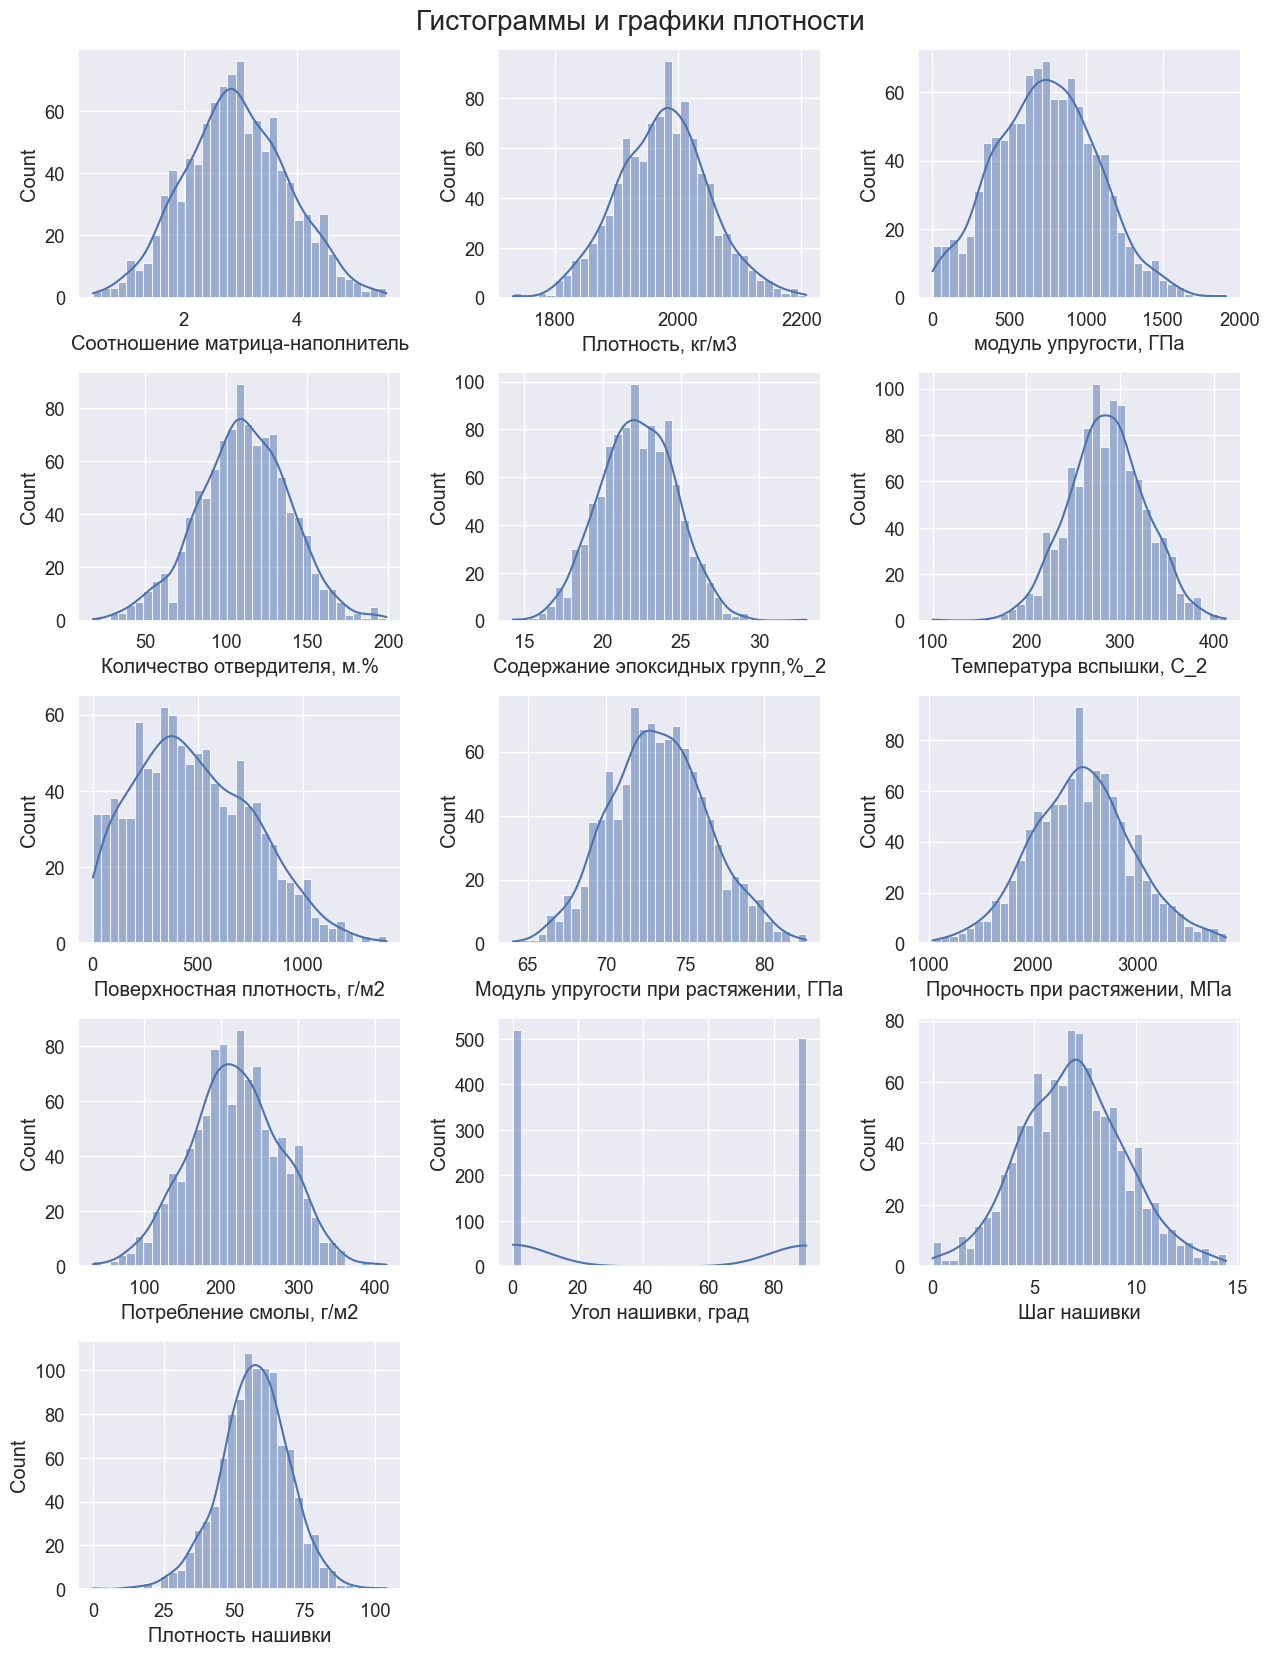

In [70]:
def histplot(df):
    sns.set (font_scale=1.2)
    fig=plt.figure(figsize=(15, 20))
    plt.suptitle('Гистограммы и графики плотности', size=20, y=0.9)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    for i, column in enumerate(df.columns):
        ax=fig.add_subplot(5, 3, i+1)
        sns.histplot(data=df, x=column, kde=True, bins=35)
histplot(df)

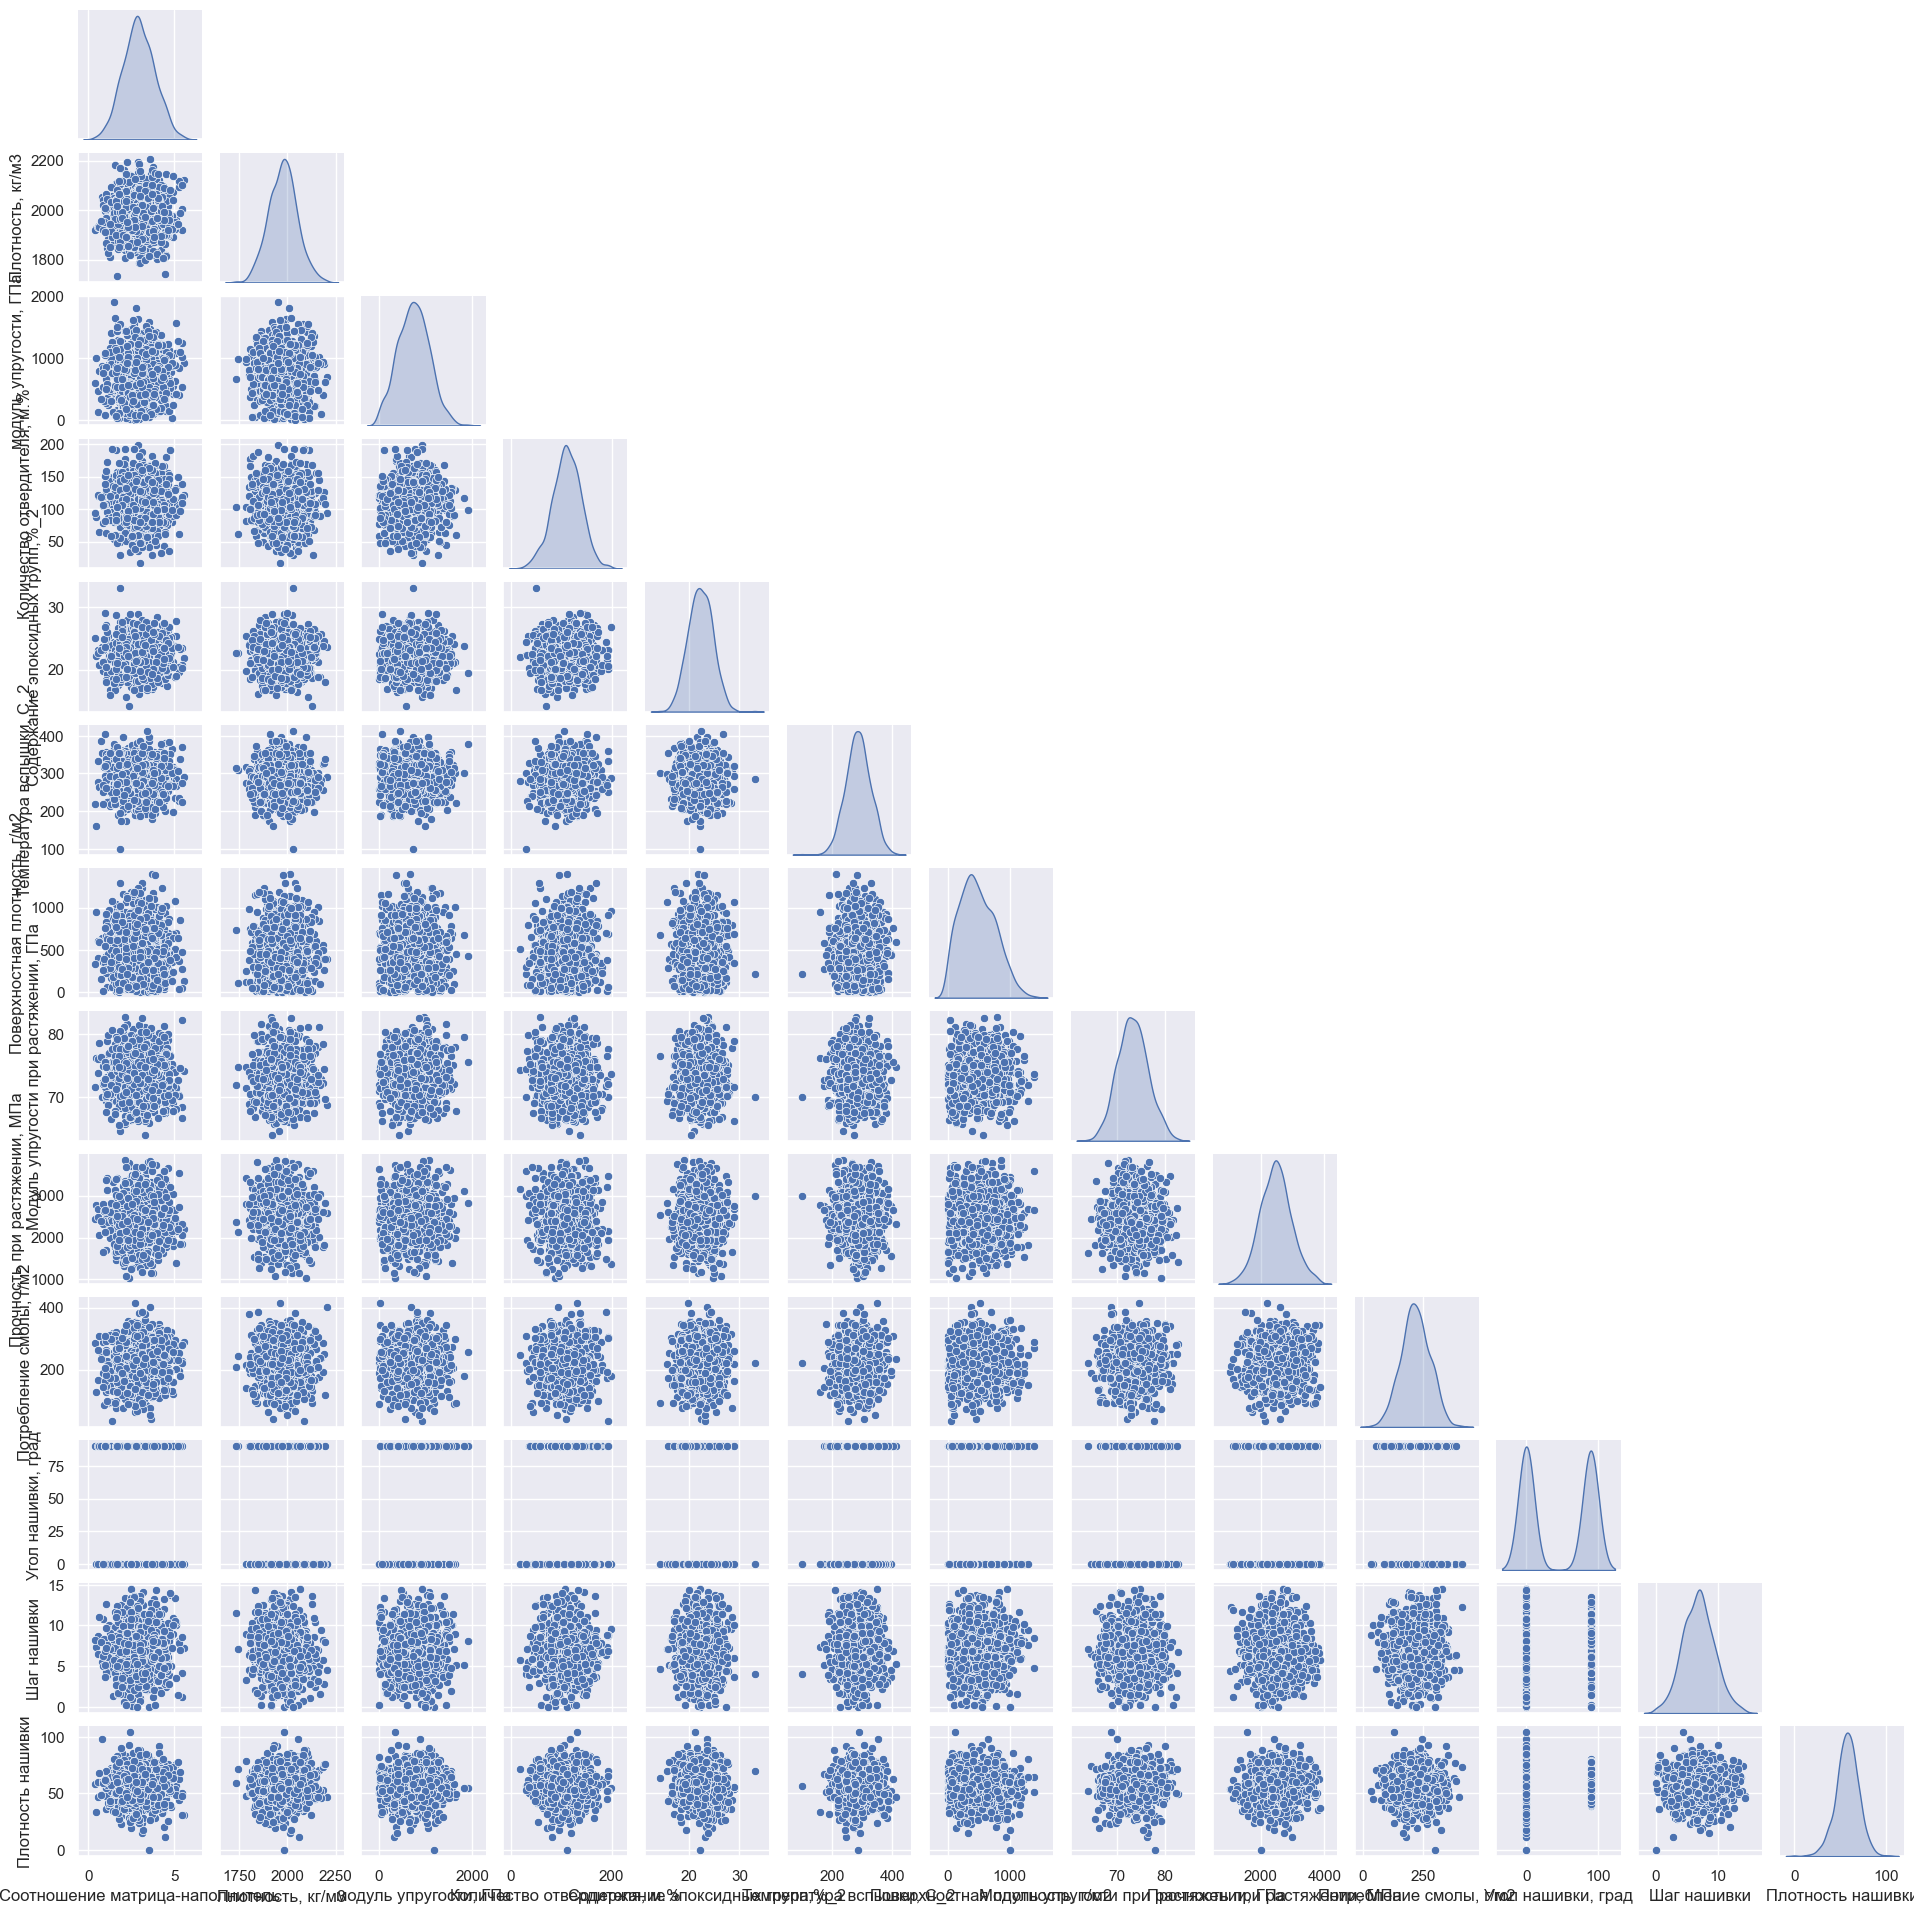

In [69]:
def pairplot(df):
    sns.pairplot(df, height=1.5, diag_kind='kde', corner=True)
pairplot(df)

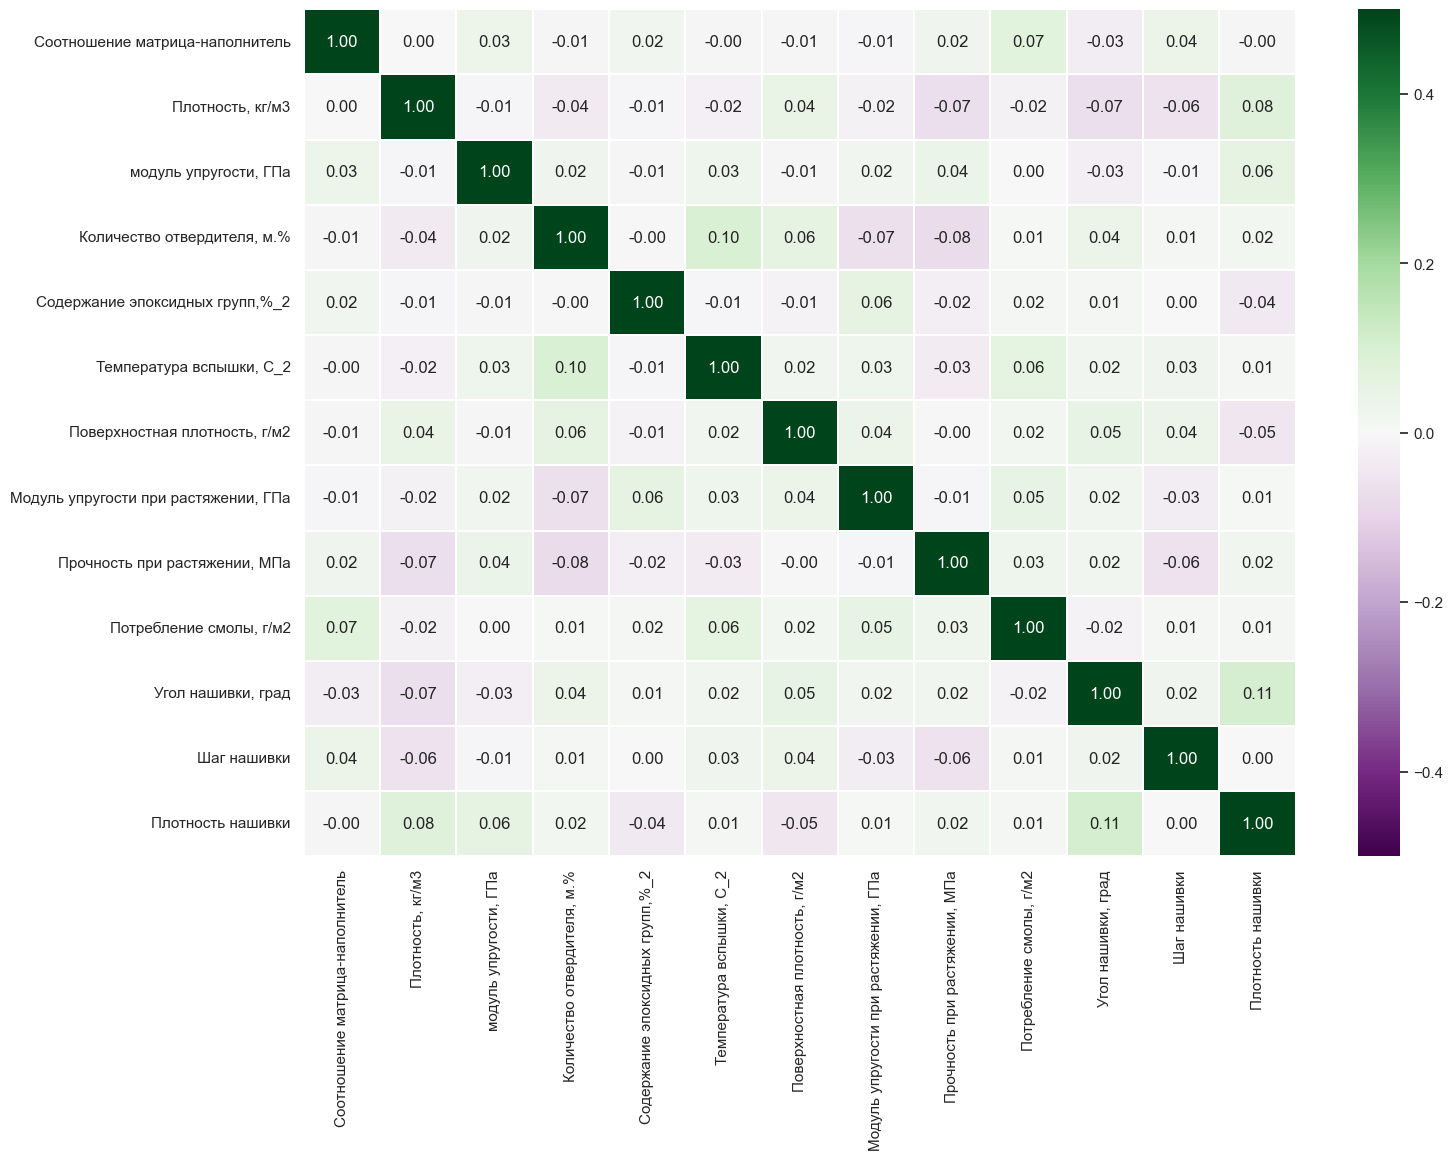

In [68]:
def heatmap(df):
    fig, ax = plt.subplots(figsize=(16, 11))
    sns.heatmap(df.corr(), vmin=-0.5, vmax=0.5, cmap='PRGn', annot=True, fmt='.2f', linewidths = 0.1, ax=ax)
heatmap(df)

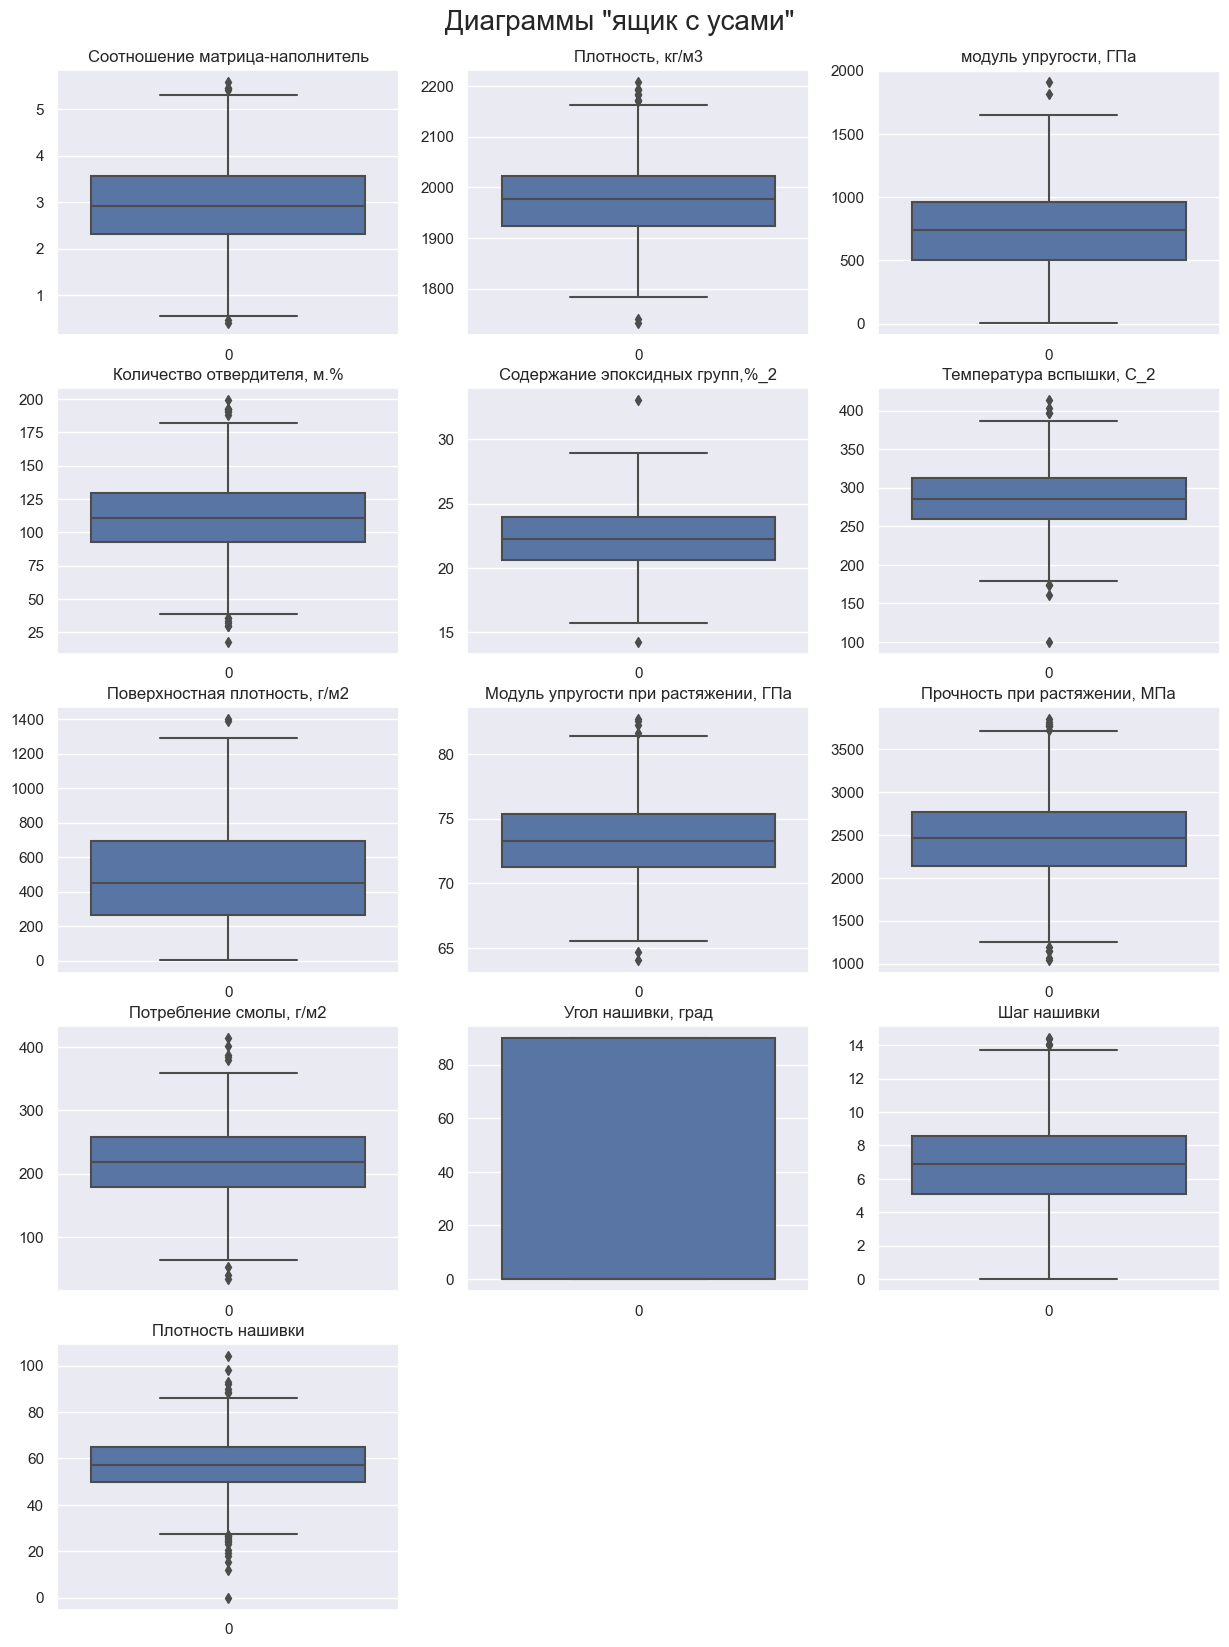

In [67]:
def boxplot(df):
    plt.figure(figsize=(15,20))
    plt.suptitle('Диаграммы "ящик с усами"', size=20,  y=0.91)
    for i, column in enumerate(df.columns):
        plt.subplot(5, 3, i+1)
        sns.boxplot(df[column]) 
        plt.title(df[column].name)
boxplot(df)

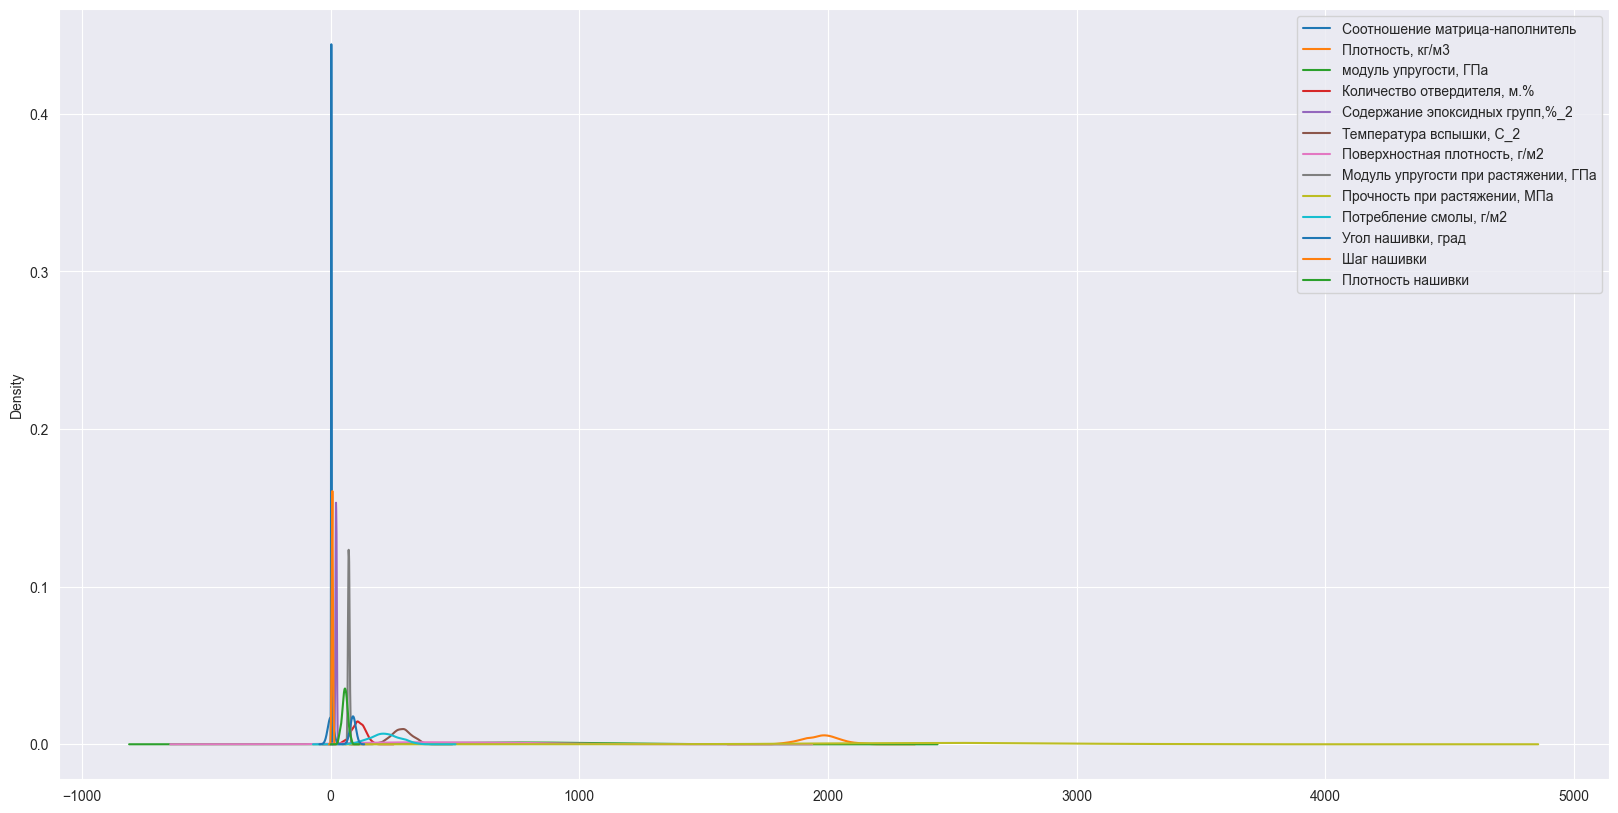

In [61]:
def plot(df):
  fig, ax = plt.subplots(figsize=(20, 10))
  df.plot(kind='kde', ax=ax)
plot(df)

In [8]:
# Колличество выбросов и аномальных значений в столбцах исходного dataset
def outlier(df):
    i = 1 
    j = 0
    for column in df.columns:
        outlier = boxplot_stats(df[column])
        print (f'Количество выбросов в столбце {column}: {len(outlier[0]["fliers"])}')
        j += len(outlier[0]['fliers'])
        i += 1
    print(f'Общее число ошибок: {j}')
outlier(df)

Количество выбросов в столбце Соотношение матрица-наполнитель: 6
Количество выбросов в столбце Плотность, кг/м3: 9
Количество выбросов в столбце модуль упругости, ГПа: 2
Количество выбросов в столбце Количество отвердителя, м.%: 14
Количество выбросов в столбце Содержание эпоксидных групп,%_2: 2
Количество выбросов в столбце Температура вспышки, С_2: 8
Количество выбросов в столбце Поверхностная плотность, г/м2: 2
Количество выбросов в столбце Модуль упругости при растяжении, ГПа: 6
Количество выбросов в столбце Прочность при растяжении, МПа: 11
Количество выбросов в столбце Потребление смолы, г/м2: 8
Количество выбросов в столбце Угол нашивки, град: 0
Количество выбросов в столбце Шаг нашивки: 4
Количество выбросов в столбце Плотность нашивки: 21
Общее число ошибок: 93


In [11]:
# запустить строку 3 раза
for i in df.columns:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan
df.dropna(inplace = True)
df.shape

(922, 13)

In [15]:
outlier(df)

Количество выбросов в столбце Соотношение матрица-наполнитель: 0
Количество выбросов в столбце Плотность, кг/м3: 0
Количество выбросов в столбце модуль упругости, ГПа: 0
Количество выбросов в столбце Количество отвердителя, м.%: 0
Количество выбросов в столбце Содержание эпоксидных групп,%_2: 0
Количество выбросов в столбце Температура вспышки, С_2: 0
Количество выбросов в столбце Поверхностная плотность, г/м2: 0
Количество выбросов в столбце Модуль упругости при растяжении, ГПа: 0
Количество выбросов в столбце Прочность при растяжении, МПа: 0
Количество выбросов в столбце Потребление смолы, г/м2: 0
Количество выбросов в столбце Угол нашивки, град: 0
Количество выбросов в столбце Шаг нашивки: 0
Количество выбросов в столбце Плотность нашивки: 0
Общее число ошибок: 0


In [13]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [16]:
scaler = MinMaxScaler()
columns = df.columns
df_n = scaler.fit_transform(np.array(df))
df_n = pd.DataFrame(df_n, columns=columns)
df_n.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.274768          0.651097               0.452951   
1                         0.274768          0.651097               0.452951   
2                         0.466552          0.651097               0.461725   
3                         0.465836          0.571539               0.458649   
4                         0.424236          0.332865               0.494944   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.079153                         0.607435   
1                     0.630983                         0.418887   
2                     0.511257                         0.495653   
3                     0.511257                         0.495653   
4                     0.511257                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.509164                        0.16223   
1                  0.583596                        0.16223   
2                  0.509164                        0.16223   
3                  0.509164                        0.16223   
4                  0.509164                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.272962                       0.727777   
1                              0.272962                       0.727777   
2                              0.272962                       0.727777   
3                              0.272962                       0.727777   
4                              0.272962                       0.727777   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.514688                 0.0     0.289334           0.546433  
1                 0.514688                 0.0     0.362355           0.319758  
2                 0.514688                 0.0     0.362355           0.494123  
3                 0.514688                 0.0     0.362355           0.546433  
4                 0.514688                 0.0     0.362355           0.720799

In [17]:
scaler.inverse_transform(np.array(df_n)[:1,:])

array([[1.85714286e+00, 2.03000000e+03, 7.38736842e+02, 5.00000000e+01,
        2.37500000e+01, 2.84615385e+02, 2.10000000e+02, 7.00000000e+01,
        3.00000000e+03, 2.20000000e+02, 0.00000000e+00, 4.00000000e+00,
        6.00000000e+01]])

In [59]:
df_n.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       922.0  0.499412  0.187858  0.0   
Плотность, кг/м3                      922.0  0.502904  0.188395  0.0   
модуль упругости, ГПа                 922.0  0.451341  0.201534  0.0   
Количество отвердителя, м.%           922.0  0.506200  0.186876  0.0   
Содержание эпоксидных групп,%_2       922.0  0.490578  0.180548  0.0   
Температура вспышки, С_2              922.0  0.516739  0.190721  0.0   
Поверхностная плотность, г/м2         922.0  0.373295  0.217269  0.0   
Модуль упругости при растяжении, ГПа  922.0  0.487343  0.196366  0.0   
Прочность при растяжении, МПа         922.0  0.503776  0.188668  0.0   
Потребление смолы, г/м2               922.0  0.507876  0.199418  0.0   
Угол нашивки, град                    922.0  0.510846  0.500154  0.0   
Шаг нашивки                           922.0  0.503426  0.183587  0.0   
Плотность нашивки                     922.0  0.503938  0.193933  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.371909  0.495189  0.629774  1.0  
Плотность, кг/м3                      0.368184  0.511396  0.624719  1.0  
модуль упругости, ГПа                 0.305188  0.451377  0.587193  1.0  
Количество отвердителя, м.%           0.378514  0.506382  0.638735  1.0  
Содержание эпоксидных групп,%_2       0.366571  0.488852  0.623046  1.0  
Температура вспышки, С_2              0.386228  0.516931  0.646553  1.0  
Поверхностная плотность, г/м2         0.204335  0.354161  0.538397  1.0  
Модуль упругости при растяжении, ГПа  0.353512  0.483718  0.617568  1.0  
Прочность при растяжении, МПа         0.373447  0.501481  0.624299  1.0  
Потребление смолы, г/м2               0.374647  0.510143  0.642511  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.372844  0.506414  0.626112  1.0  
Плотность нашивки                     0.376869  0.504310  0.630842  1.0

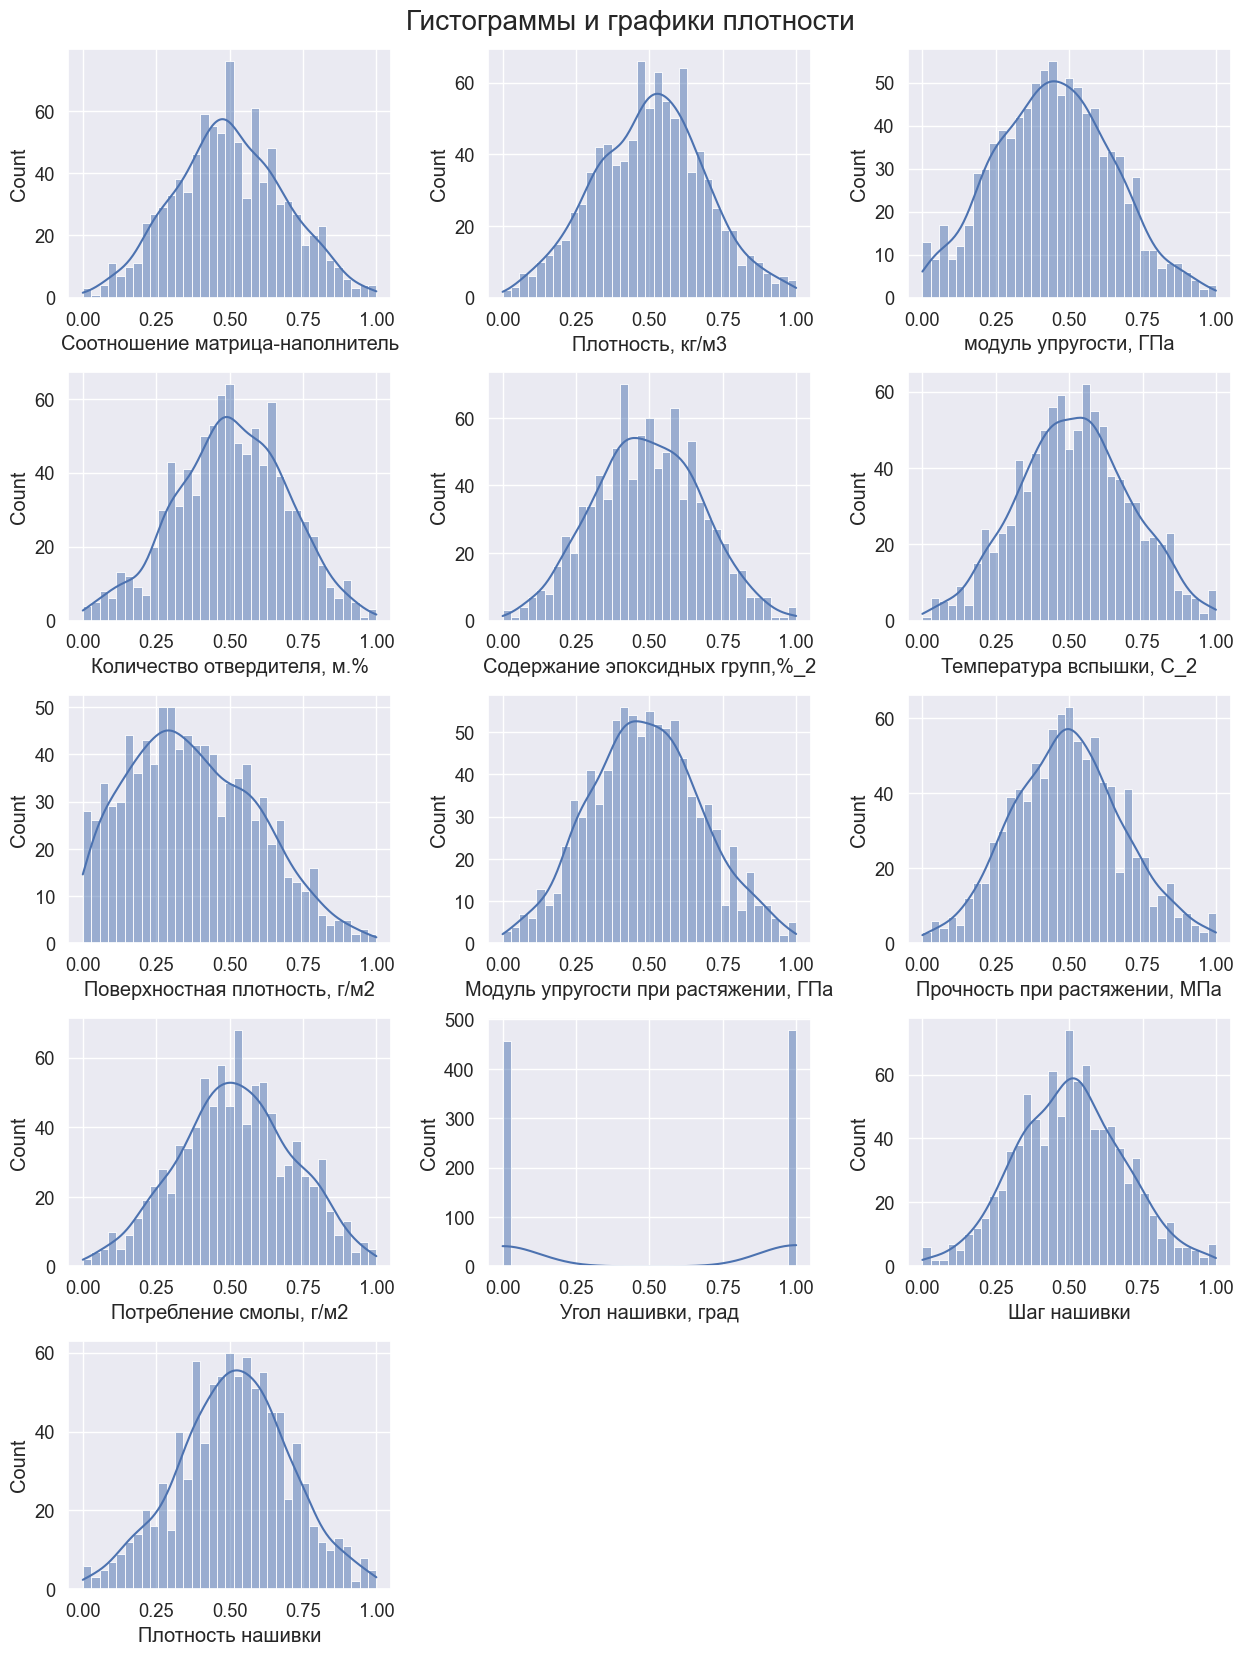

In [83]:
histplot(df_n)

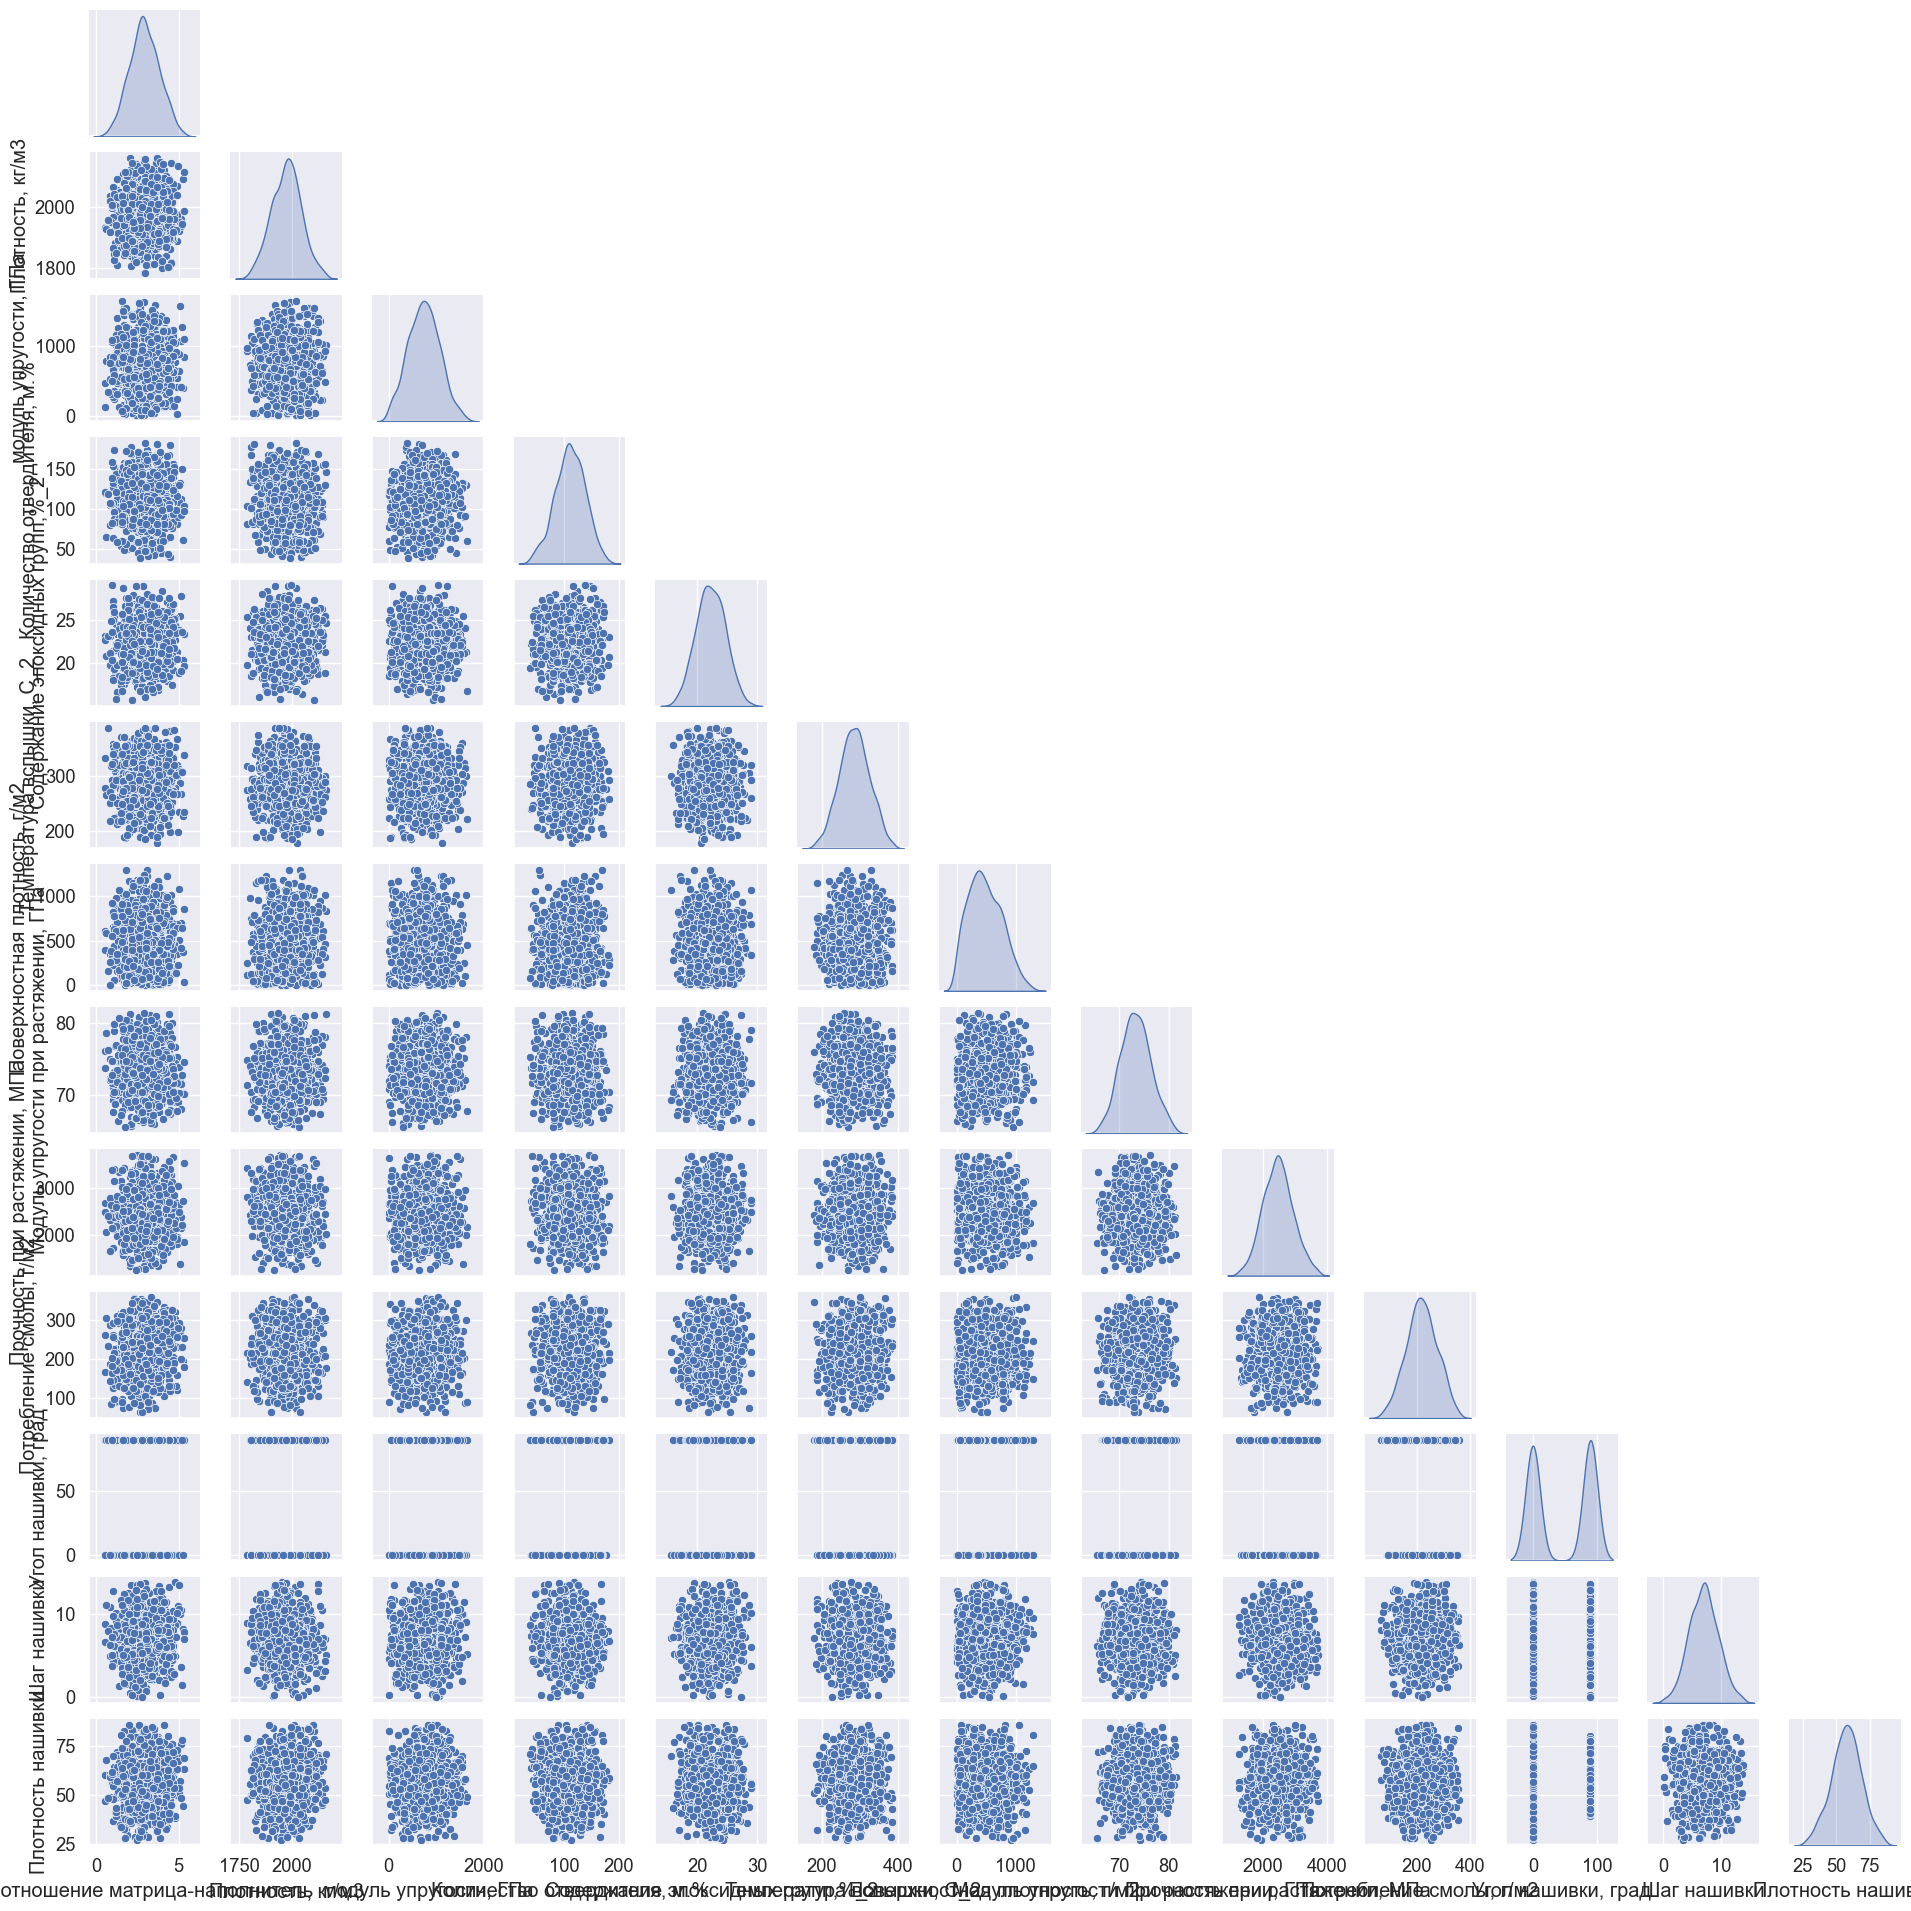

In [80]:
pairplot(df_n)

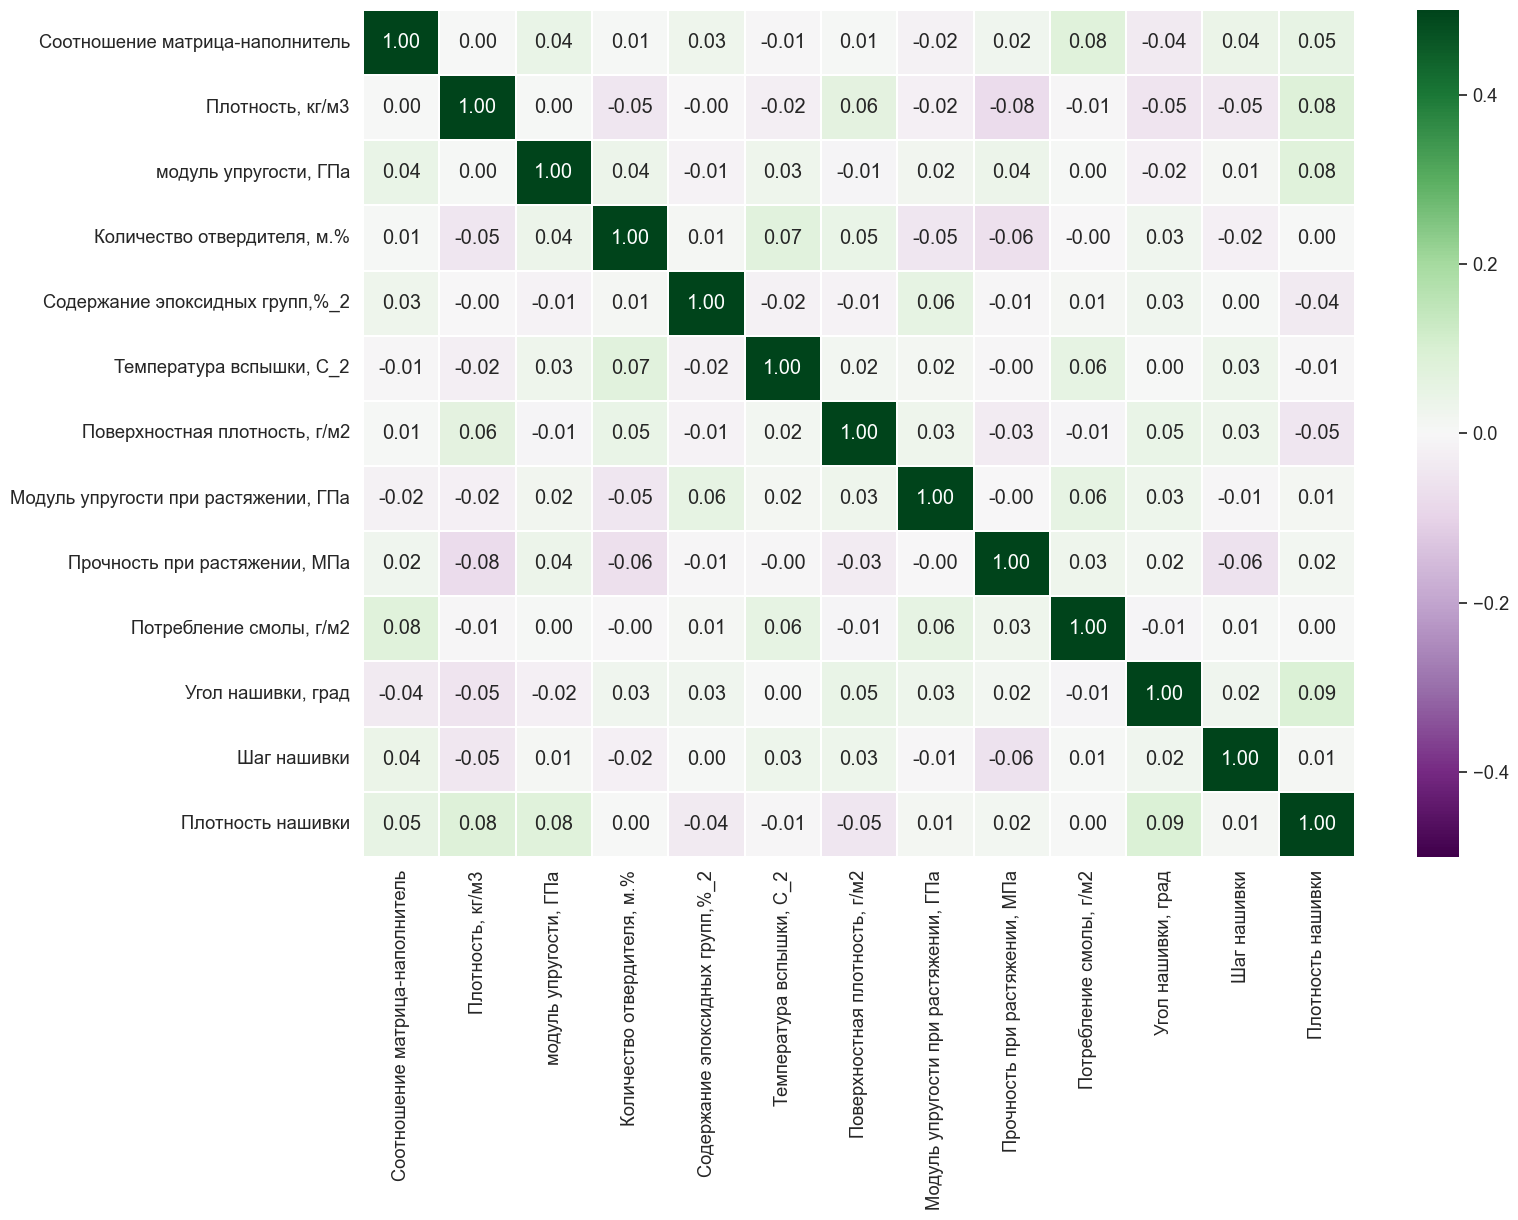

In [84]:
heatmap(df_n)

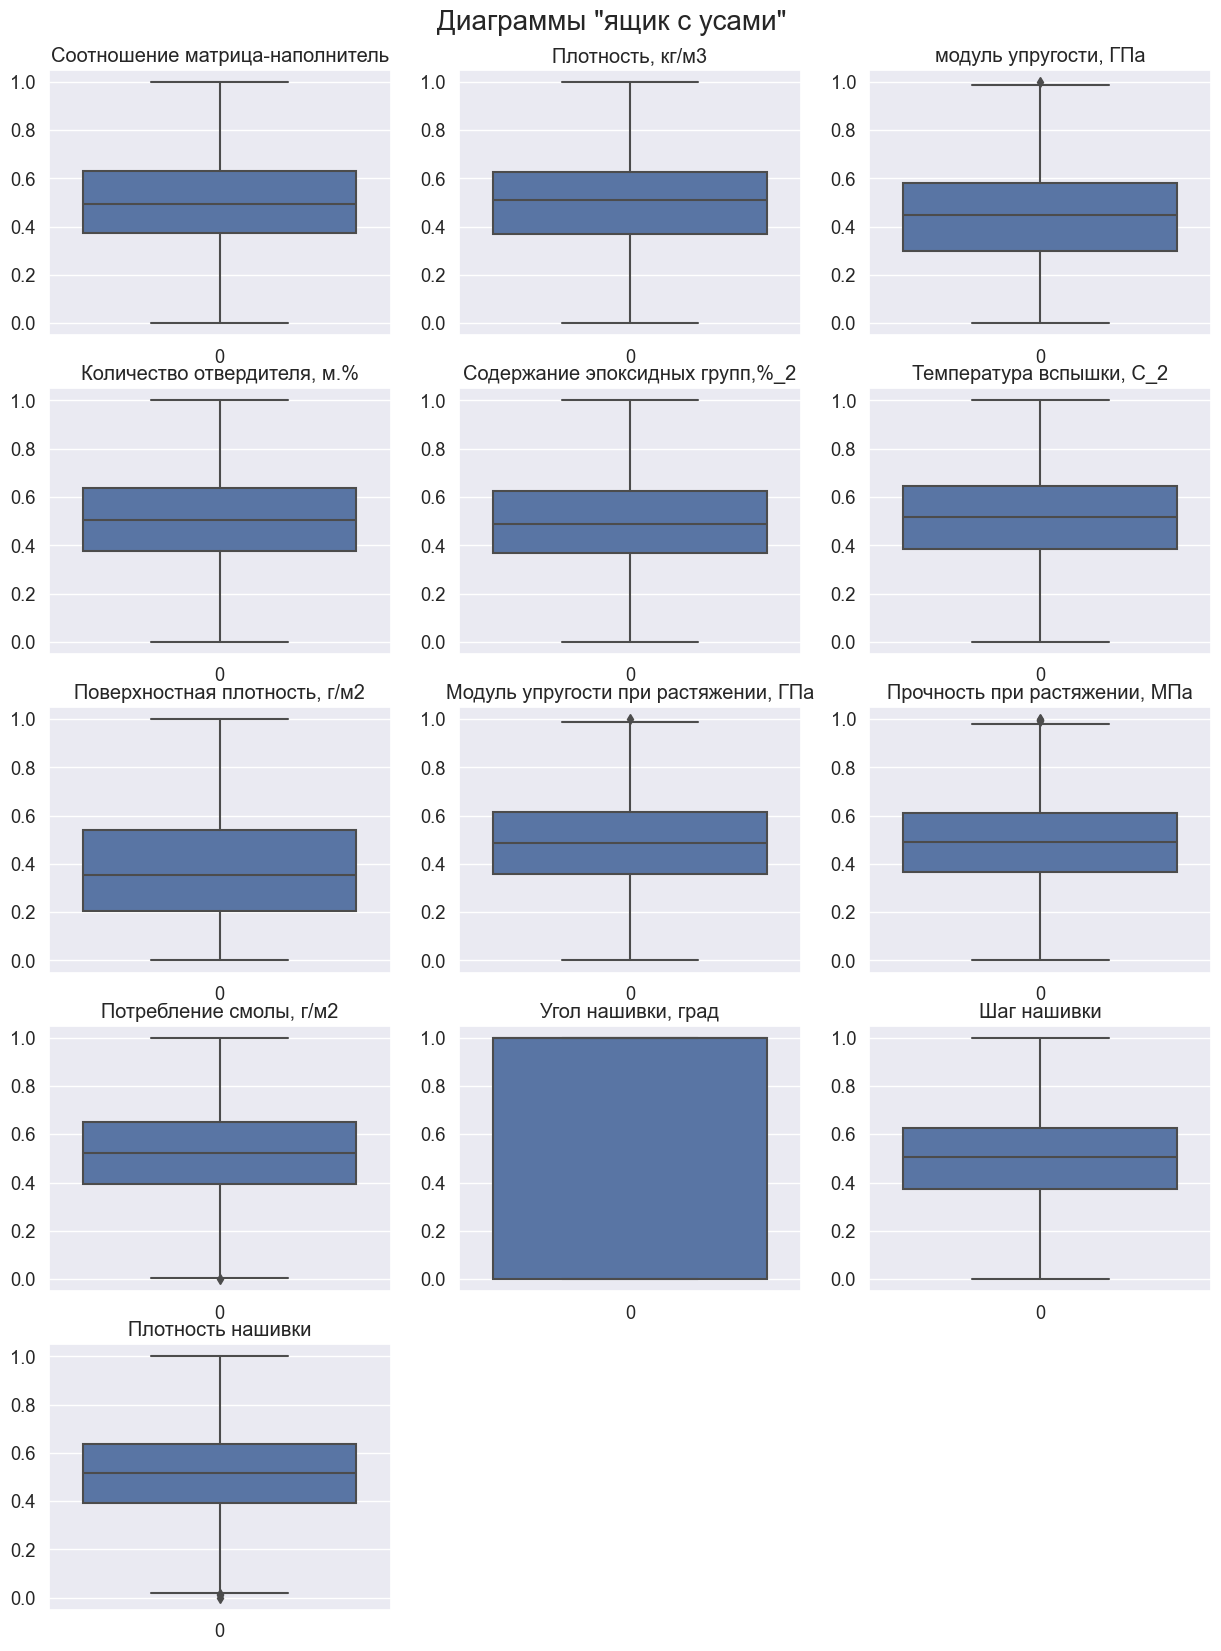

In [85]:
boxplot(df_n)

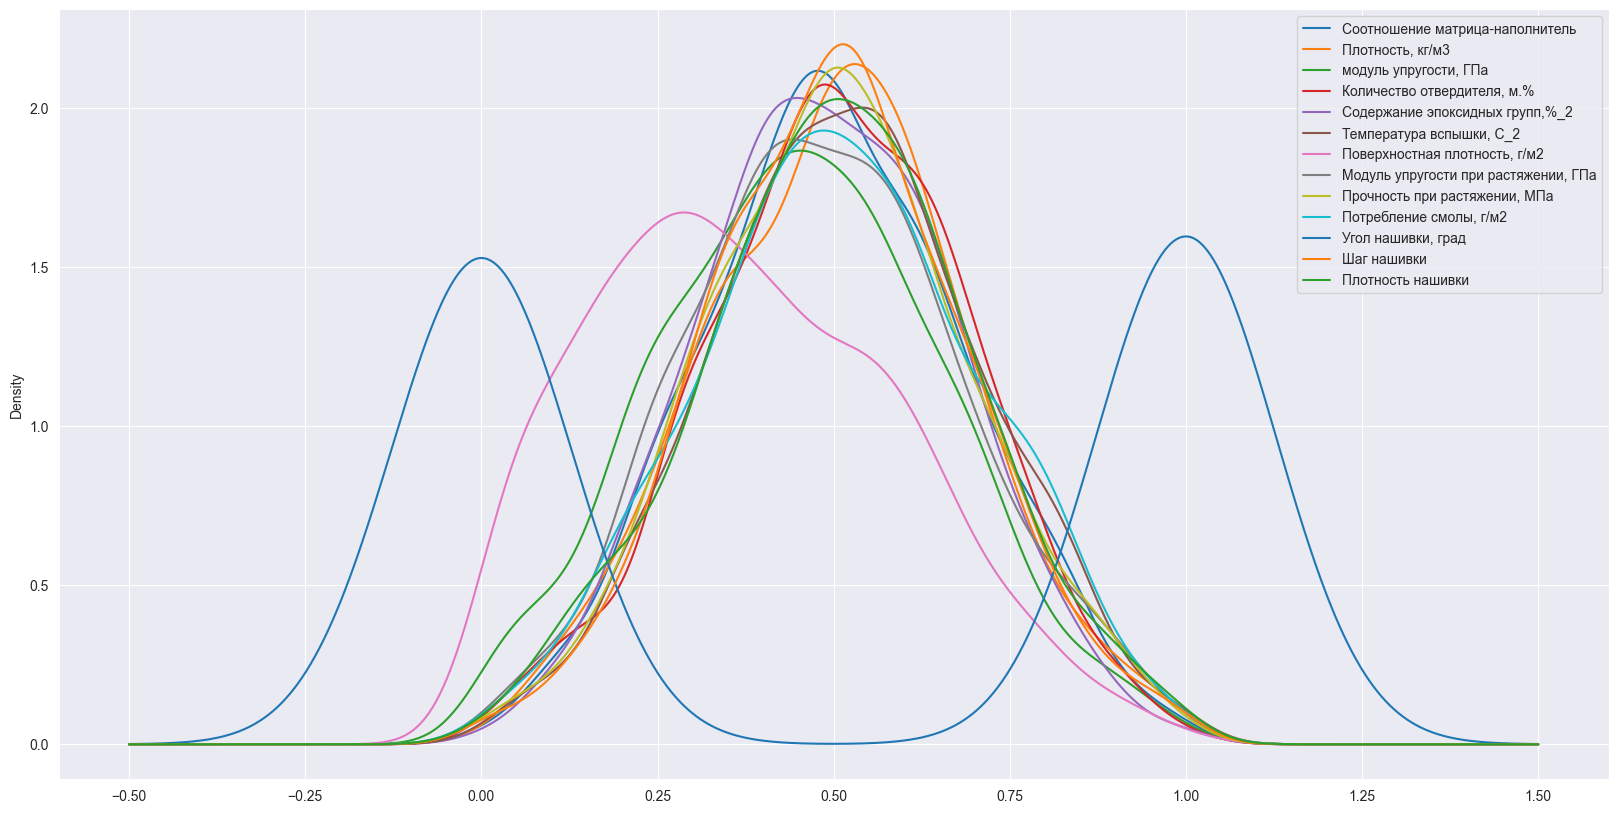

In [62]:
plot(df_n)

In [144]:
info_df = pd.DataFrame(columns=['target', 'model', 'MAE', 'MSE', 'MAPE', 'RMSE', 'R2', 'score'])

In [145]:
def metrics(models_list, models_name_list, X_train, y_train, X_test, y_test):
    global info_df
    k = 0
    for i in models_list:
        model = i.fit(X_train, y_train)
        model_pred = model.predict(X_test)
        MAE = round(mean_absolute_error(y_test, model_pred), 3)
        MSE = round(mean_squared_error(y_test, model_pred), 3)
        MAPE = round(mean_absolute_percentage_error(y_test, model_pred), 3)
        RMSE = round(np.sqrt(mean_squared_error(y_test, model_pred)), 3)
        R2 = round(r2_score(y_test, model_pred), 3)
        score = round(i.score(X_train, y_train), 3)
        df = pd.DataFrame({'model': models_name_list[k],
                           'target': 'Модуль упругости при растяжении, ГПа',
                           'MAE': MAE,
                           'MSE': MSE,
                           'MAPE': MAPE,
                           'RMSE': RMSE,
                           'R2': R2,
                           'score': score
                          }, index=[0])
        info_df =  pd.concat([info_df, df], ignore_index=True)
        k += 1
    return info_df

In [59]:
lr = LinearRegression()
lasso = Lasso()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
abr = AdaBoostRegressor()
models_list = [lr, lasso, rf, knn, svr, dtr, abr]
models_name_list = ['LinearRegression', 'Lasso', 'RandomForestRegressor', 'KNeighborsRegressor',
                    'SVR', 'DecisionTreeRegressor', 'AdaBoostRegressor']

In [24]:
target = ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']
y = df_n[target[0]]
X = df_n.drop(target, axis=1)
print(y.shape)
print(X.shape)

(922,)
(922, 11)


In [25]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [26]:
# размеры обучающих и тестовых наборов данных
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (617, 11)
X_test: (305, 11)
y_train: (617,)
y_test: (305,)


In [148]:
metrics(models_list, models_name_list, X_train, y_train, X_test, y_test)

target                  model    MAE    MSE  \
0  Модуль упругости при растяжении, ГПа       LinearRegression  0.162  0.038   
1  Модуль упругости при растяжении, ГПа                  Lasso  0.161  0.038   
2  Модуль упругости при растяжении, ГПа  RandomForestRegressor  0.161  0.038   
3  Модуль упругости при растяжении, ГПа    KNeighborsRegressor  0.176  0.046   
4  Модуль упругости при растяжении, ГПа                    SVR  0.176  0.047   
5  Модуль упругости при растяжении, ГПа  DecisionTreeRegressor  0.223  0.077   
6  Модуль упругости при растяжении, ГПа      AdaBoostRegressor  0.164  0.039   

    MAPE   RMSE     R2  score  
0  0.661  0.195 -0.012  0.019  
1  0.662  0.194 -0.000  0.000  
2  0.665  0.196 -0.019  0.847  
3  0.704  0.215 -0.232  0.173  
4  0.707  0.216 -0.247  0.465  
5  0.920  0.277 -1.050  1.000  
6  0.687  0.198 -0.040  0.129

In [21]:
y_2 = df_n[target[1]]

In [22]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y_2, test_size=0.33, random_state=0)

In [23]:
# размеры обучающих и тестовых наборов данных
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (617, 11)
X_test: (305, 11)
y_train: (617,)
y_test: (305,)


In [157]:
def metrics_2(models_list, models_name_list, X_train_2, y_train_2, X_test_2, y_test_2):
    global info_df
    k = 0
    for i in models_list:
        model = i.fit(X_train_2, y_train_2)
        model_pred = model.predict(X_test_2)
        MAE = round(mean_absolute_error(y_test_2, model_pred), 3)
        MSE = round(mean_squared_error(y_test_2, model_pred), 3)
        MAPE = round(mean_absolute_percentage_error(y_test_2, model_pred), 3)
        RMSE = round(np.sqrt(mean_squared_error(y_test_2, model_pred)), 3)
        R2 = round(r2_score(y_test_2, model_pred), 3)
        score = round(i.score(X_train, y_train), 3)
        df = pd.DataFrame({'model': models_name_list[k],
                           'target': 'Прочность при растяжении, МПа',
                           'MAE': MAE,
                           'MSE': MSE,
                           'MAPE': MAPE,
                           'RMSE': RMSE,
                           'R2': R2,
                           'score': score
                          }, index=[0])
        info_df =  pd.concat([info_df, df], ignore_index=True)
        k += 1
    return info_df

In [158]:
metrics_2(models_list, models_name_list, X_train_2, y_train_2, X_test_2, y_test_2)

target                  model    MAE    MSE  \
0   Модуль упругости при растяжении, ГПа       LinearRegression  0.162  0.038   
1   Модуль упругости при растяжении, ГПа                  Lasso  0.161  0.038   
2   Модуль упругости при растяжении, ГПа  RandomForestRegressor  0.161  0.038   
3   Модуль упругости при растяжении, ГПа    KNeighborsRegressor  0.176  0.046   
4   Модуль упругости при растяжении, ГПа                    SVR  0.176  0.047   
5   Модуль упругости при растяжении, ГПа  DecisionTreeRegressor  0.223  0.077   
6   Модуль упругости при растяжении, ГПа      AdaBoostRegressor  0.164  0.039   
7          Прочность при растяжении, МПа       LinearRegression  0.146  0.034   
8          Прочность при растяжении, МПа                  Lasso  0.146  0.034   
9          Прочность при растяжении, МПа  RandomForestRegressor  0.147  0.034   
10         Прочность при растяжении, МПа    KNeighborsRegressor  0.160  0.040   
11         Прочность при растяжении, МПа                    SVR  0.157  0.039   
12         Прочность при растяжении, МПа  DecisionTreeRegressor  0.215  0.070   
13         Прочность при растяжении, МПа      AdaBoostRegressor  0.150  0.035   

     MAPE   RMSE     R2  score  
0   0.661  0.195 -0.012  0.019  
1   0.662  0.194 -0.000  0.000  
2   0.665  0.196 -0.019  0.847  
3   0.704  0.215 -0.232  0.173  
4   0.707  0.216 -0.247  0.465  
5   0.920  0.277 -1.050  1.000  
6   0.687  0.198 -0.040  0.129  
7   0.669  0.183  0.007 -0.018  
8   0.684  0.184 -0.002 -0.009  
9   0.651  0.183  0.005 -0.422  
10  0.726  0.201 -0.192 -0.227  
11  0.710  0.199 -0.167 -0.277  
12  0.779  0.265 -1.077 -0.967  
13  0.698  0.188 -0.047 -0.093

In [98]:
lr_param = {'fit_intercept': [True, False]}

lasso_param = {'alpha':[0.01, 0.02, 0.1, 0.2, 0.03, 0.3, 0.05, 0.5, 0.07,
                        0.7, 1, 5, 10, 20, 40, 80, 100, 150, 200]}

rf_param = {'n_estimators': [30, 64, 100, 128, 140, 200],
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'max_features': ['sqrt', 'log2', None],
           }

knn_param = {'n_neighbors' : range(1, 301, 2),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

svr_param = {'C': [0.01, 0.1, 0.5, 1],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

dtr_param = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
             'splitter': ['best', 'random'],
             'max_depth': [1, 5, 10, 15, 20],
             'min_samples_split': [100, 200, 300],
             'min_samples_leaf': [200, 300, 40],
             'max_features': ['auto', 'sqrt', 'log2']
            }

abr_param = {'n_estimators': [6, 8, 10, 20, 50, 100],
            'learning_rate': [0.01, 0.1, 0.5, 1],
            'loss': ['linear', 'square', 'exponential']
            }
list_param = [lr_param, lasso_param, rf_param, knn_param, svr_param, dtr_param, abr_param]

In [96]:
def best_param(models_list, list_param, X_train, y_train):
    k = 0
    for i in models_list:
        model_gs = GridSearchCV(estimator=i,
                                param_grid=list_param[k],
                                n_jobs=-1,
                                cv=10
                               ).fit(X_train,y_train)
        k += 1
        print(f'{i} - {model_gs.best_params_}')

In [97]:
best_param(models_list, list_param, X_train, y_train)

LinearRegression() - {'fit_intercept': True}
Lasso() - {'alpha': 0.01}
RandomForestRegressor() - {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 30}
KNeighborsRegressor() - {'algorithm': 'auto', 'n_neighbors': 139, 'weights': 'uniform'}
SVR() - {'C': 0.1, 'kernel': 'sigmoid'}
DecisionTreeRegressor() - {'criterion': 'poisson', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 200, 'min_samples_split': 200, 'splitter': 'best'}
AdaBoostRegressor() - {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 10}


In [173]:
y = df_n['Соотношение матрица-наполнитель']
X = df_n.drop('Соотношение матрица-наполнитель', axis=1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [175]:
# размеры обучающих и тестовых наборов данных
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (645, 12)
X_test: (277, 12)
y_train: (645,)
y_test: (277,)


In [162]:
# def plot_loss(history):
#     plt.plot(history.history['loss'], label='loss')
#     plt.plot(history.history['val_loss'], label='val_loss')
#     plt.ylim([0, 1])
#     plt.xlabel('Эпоха')

#     plt.ylabel('MAE [MPG]')
#     plt.legend()
#     plt.grid(True)
# model = Sequential()
# model.add(layers.Dense(50, input_dim=X.shape[1], activation='relu'))
# model.add(layers.Dropout(0.12))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.12))
# model.add(layers.Dense(19, activation='relu'))
# model.add(layers.Dropout(0.12))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dropout(0.12))
# model.add(layers.Dense(32, activation='tanh'))
# model.add(layers.Dense(1))

NameError: name 'Sequential' is not defined

In [186]:
def plot_loss(history):
    plt.figure(figsize = (15,20))
    plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    plt.plot(history.history['val_loss'], label='Ошибка на валидацинной выборке')
    plt.xlabel('Эпоха')
    plt.ylabel('Ошибка MAE')
    plt.legend()
    plt.grid(True)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.0))
model.add(Dense(1, activation='sigmoid'))

In [189]:
model.summary()
dfmodel = model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1,
    epochs=10)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-trai

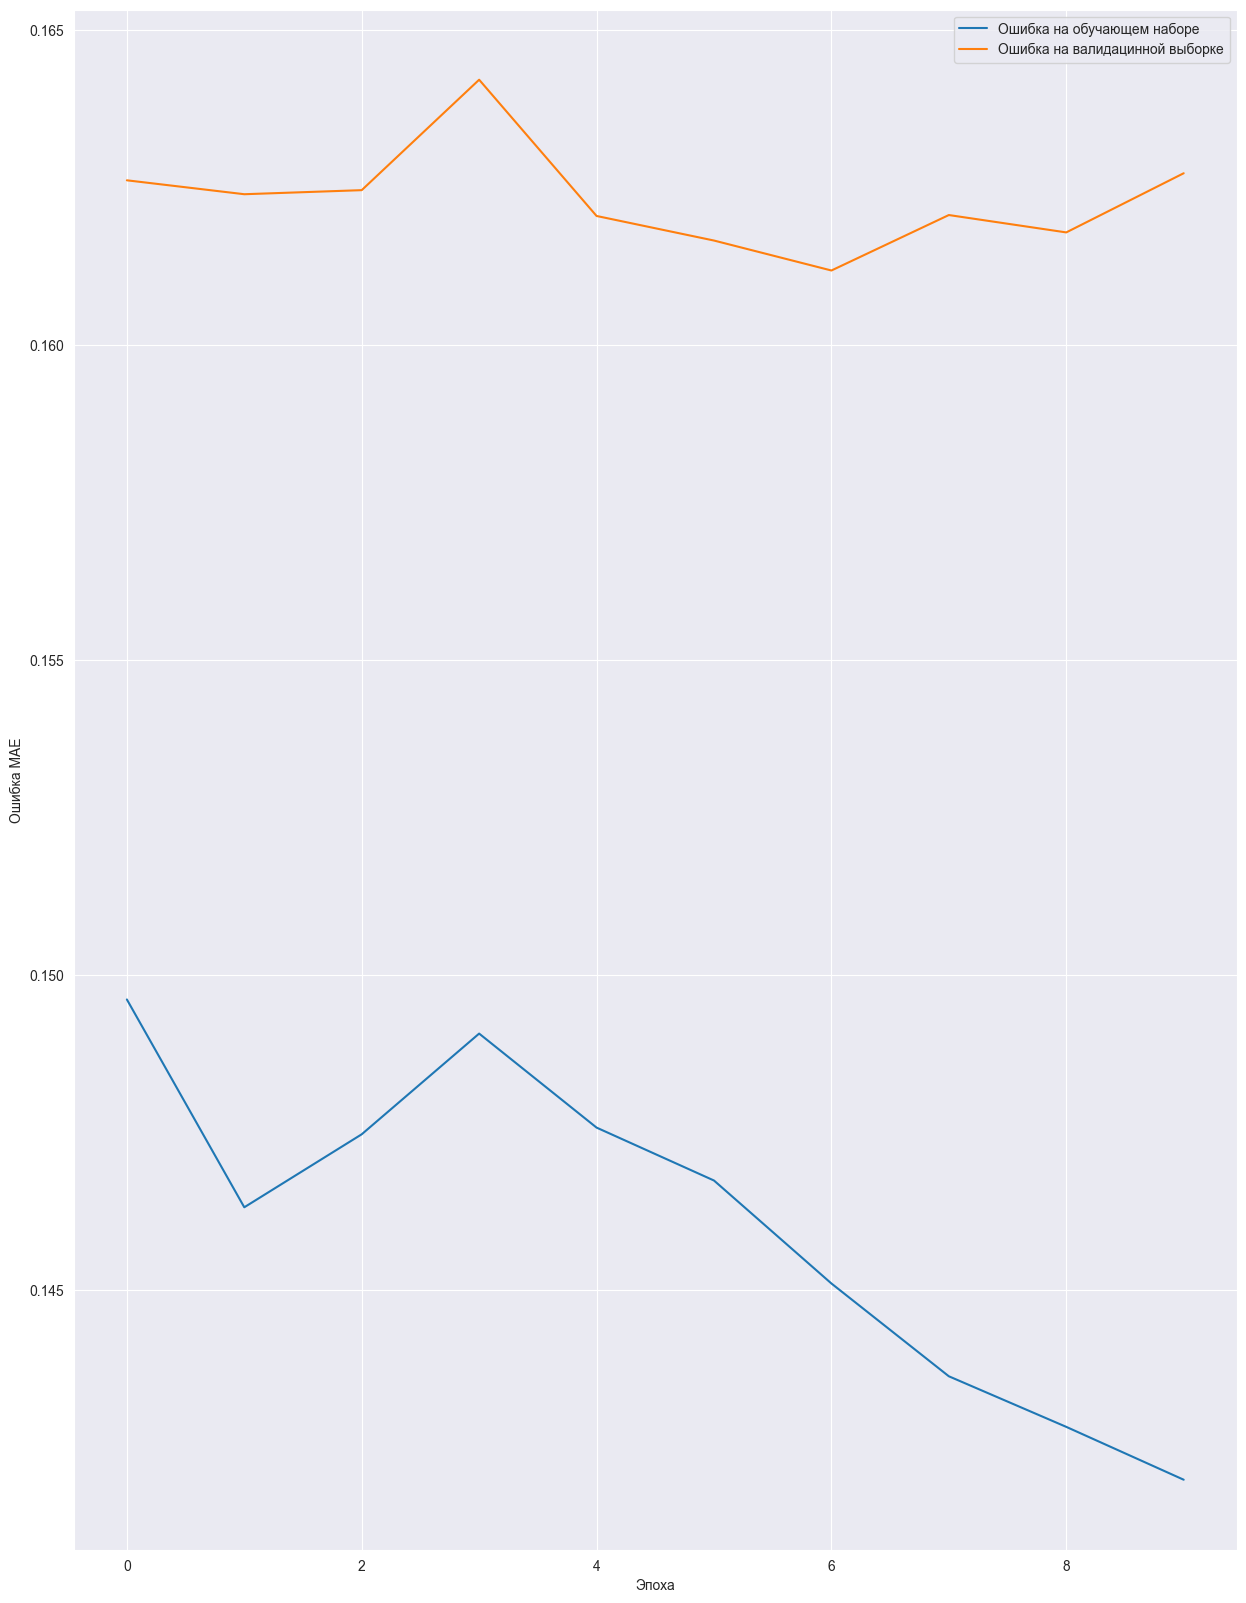

In [190]:
plot_loss(history)

9/9 [==============================] - 0s 2ms/step


Text(0.5, 0, 'Порядок')

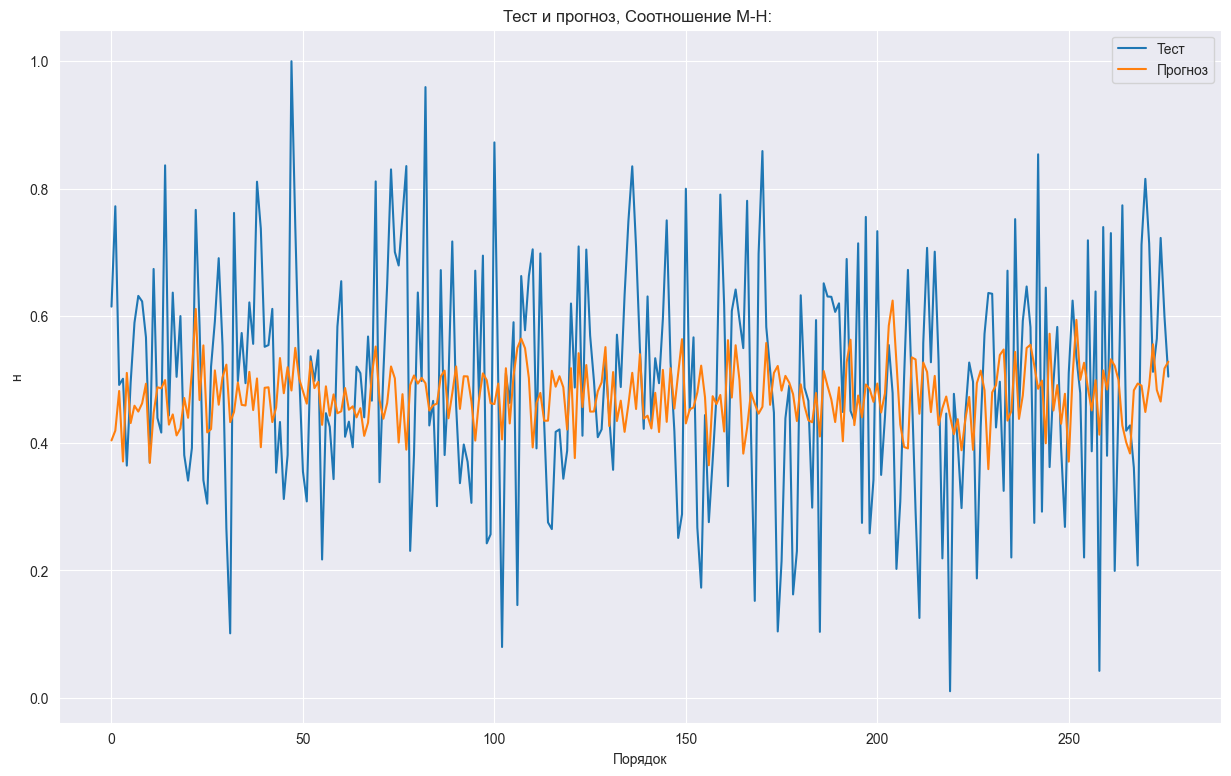

In [184]:
  plt.figure(figsize=(15,9))
  plt.title(f'Тест и прогноз, Соотношение М-Н: ')
  plt.plot(y_test.to_numpy(), label='Тест')
  plt.plot(model.predict(X_test), label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel('н')
  plt.xlabel('Порядок')

In [185]:
model.evaluate(X_test, y_test, verbose=1)

9/9 [==============================] - 0s 3ms/step - loss: 0.1484 - mae: 0.1484


[0.14837120473384857, 0.14837120473384857]